<a href="https://colab.research.google.com/github/Johannmbo/Machine_learning/blob/main/Catboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.0 MB/s eta 0:00:00


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import seaborn as sns
import shap

In [4]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols] = df[cols].replace(0,np.nan)
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [7]:
# missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


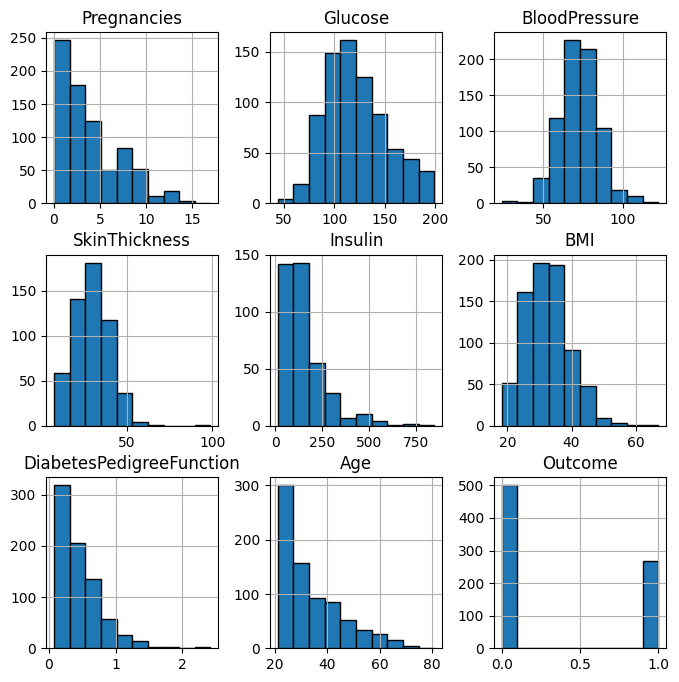

In [8]:
# Creating histograms
df.hist(figsize=(8,8), edgecolor = "black")
plt.show()

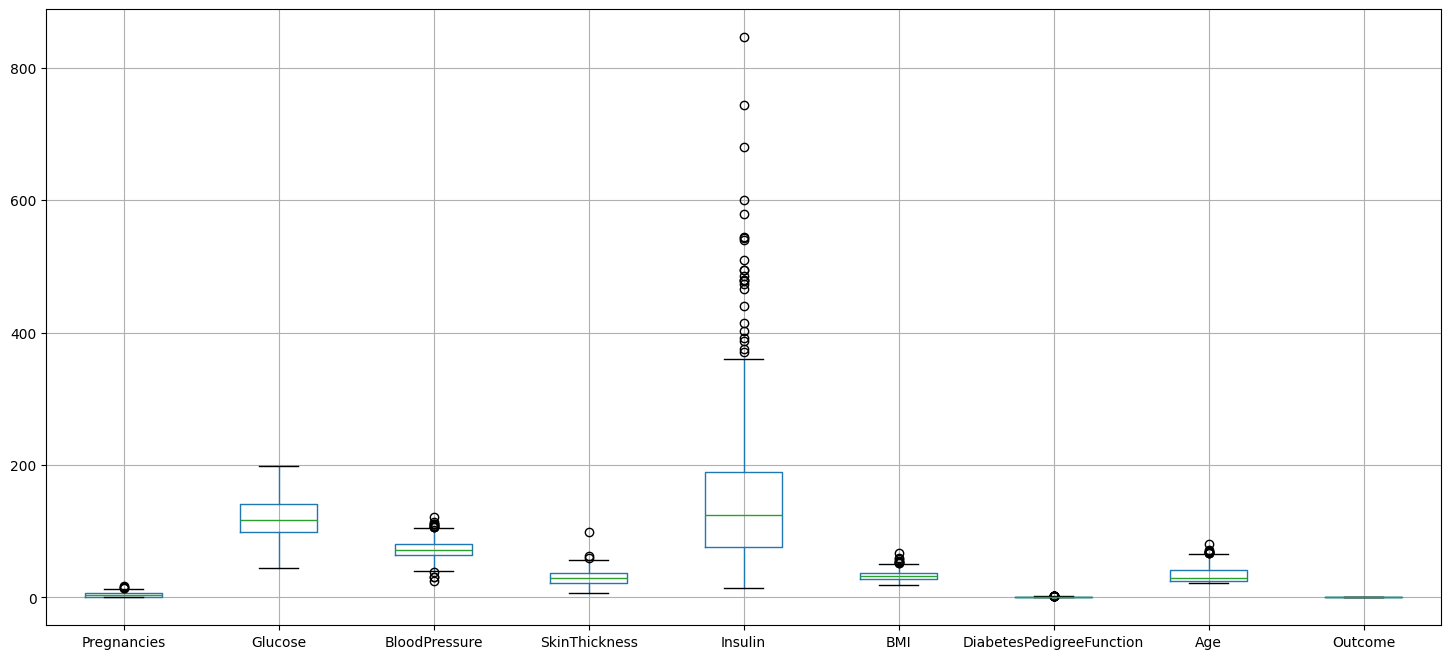

In [9]:
df.boxplot(figsize=(18,8))
plt.show()

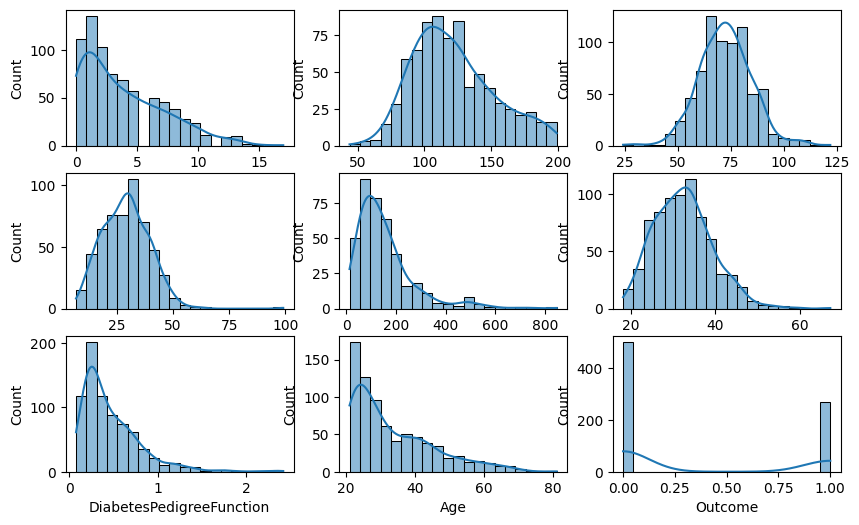

In [10]:
cols = df.columns
fig, ax = plt.subplots(3,3, figsize=(10,6))
row_index = 0
col_index = 0
for col in cols :
    sns.histplot(df[col], bins = 20, ax=ax[row_index,col_index],kde=True)
    col_index = col_index +1
    if(col_index ==3):
        col_index=0
        row_index = row_index +1

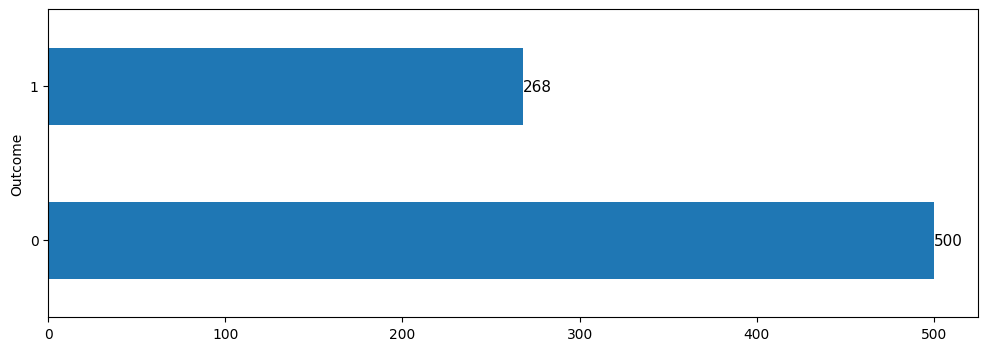

In [11]:
bar=df['Outcome'].value_counts().plot.barh(figsize=(12,4))
bar=bar.bar_label(bar.containers[0], fontsize=11)

In [12]:
y = df['Outcome']
X= df.drop(columns=['Outcome'])

### Подготовка признаков и Обучение модели

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [14]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

In [15]:
from sklearn.model_selection import RandomizedSearchCV

clf = CatBoostClassifier(verbose=False)
param_grid = {
    'iterations': [1000, 2000],
    'learning_rate': [0.01, 0.02, 0.03],
    'depth': [3, 4, 5],
    'l2_leaf_reg': [10, 20, 30],
    'bootstrap_type': ['Bernoulli', 'Bayesian'],
    'subsample': [0.7, 0.8, 0.9]
}

search = RandomizedSearchCV(
    clf,
    param_distributions=param_grid,
    n_iter=40,
    scoring='roc_auc',
    cv=4,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train_scaled, y_train)


Fitting 4 folds for each of 40 candidates, totalling 160 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 2395, in 

RandomizedSearchCV(cv=4,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7d4c9e32fa40>,
                   n_iter=40, n_jobs=-1,
                   param_distributions={'bootstrap_type': ['Bernoulli',
                                                           'Bayesian'],
                                        'depth': [3, 4, 5],
                                        'iterations': [1000, 2000],
                                        'l2_leaf_reg': [10, 20, 30],
                                        'learning_rate': [0.01, 0.02, 0.03],
                                        'subsample': [0.7, 0.8, 0.9]},
                   scoring='roc_auc', verbose=1)

In [16]:
search.best_estimator_

In [17]:
search.best_params_

{'subsample': 0.9,
 'learning_rate': 0.01,
 'l2_leaf_reg': 10,
 'iterations': 1000,
 'depth': 4,
 'bootstrap_type': 'Bernoulli'}

In [18]:
model = clf.set_params(**search.best_params_, verbose = 0)
model.fit(X_train_scaled, y_train)

In [19]:
predicted = pd.Series(model.predict(X_test_scaled))
predicted.value_counts()

,count
0,146
1,85


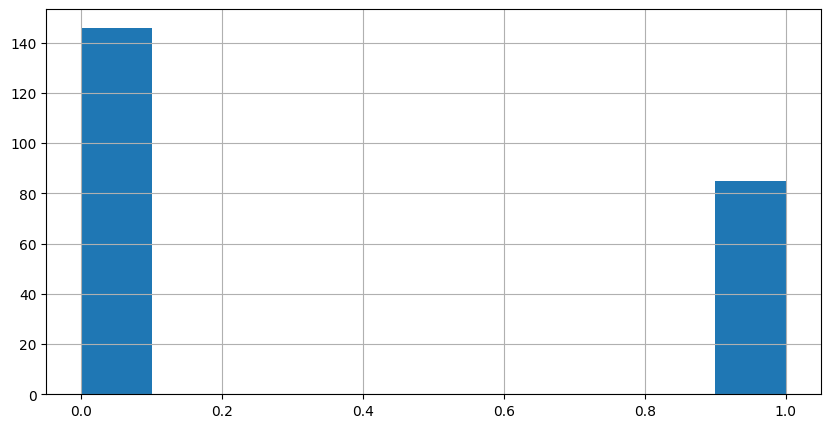

In [22]:
predicted.hist(figsize=(10,5))
plt.show()

In [23]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [26]:
print("Accuracy",metrics.accuracy_score(y_train, y_pred_train))
print("Precision",metrics.precision_score(y_train, y_pred_train))
print("Recall",metrics.recall_score(y_train, y_pred_train))

Accuracy 0.8752327746741154
Precision 0.8896551724137931
Recall 0.7166666666666667


In [27]:
print("Accuracy",metrics.accuracy_score(y_test, y_pred_test))
print("Precision",metrics.precision_score(y_test, y_pred_test))
print("Recall",metrics.recall_score(y_test, y_pred_test))

Accuracy 0.7619047619047619
Precision 0.6941176470588235
Recall 0.6704545454545454


In [29]:
print('roc_auc', metrics.roc_auc_score(y_train, y_pred_train))
print('roc_auc', metrics.roc_auc_score(y_test, y_pred_test))

roc_auc 0.8359243697478993
roc_auc 0.7443181818181818


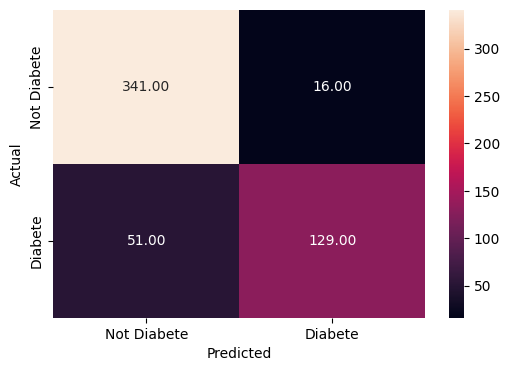

In [30]:
cm = metrics.confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Diabete', 'Diabete'], yticklabels=['Not Diabete', 'Diabete'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [31]:
model.score(X_test_scaled, y_test)

np.float64(0.7619047619047619)

In [32]:
features_importance = pd.Series(model.feature_importances_)
features_importance.index = X_train_scaled.columns
features_importance.sort_values(ascending=False)

,0
Glucose,27.978246
BMI,21.421123
Age,17.568491
DiabetesPedigreeFunction,11.195949
BloodPressure,6.771463
Insulin,6.119205
SkinThickness,4.545038
Pregnancies,4.400485


<Axes: >

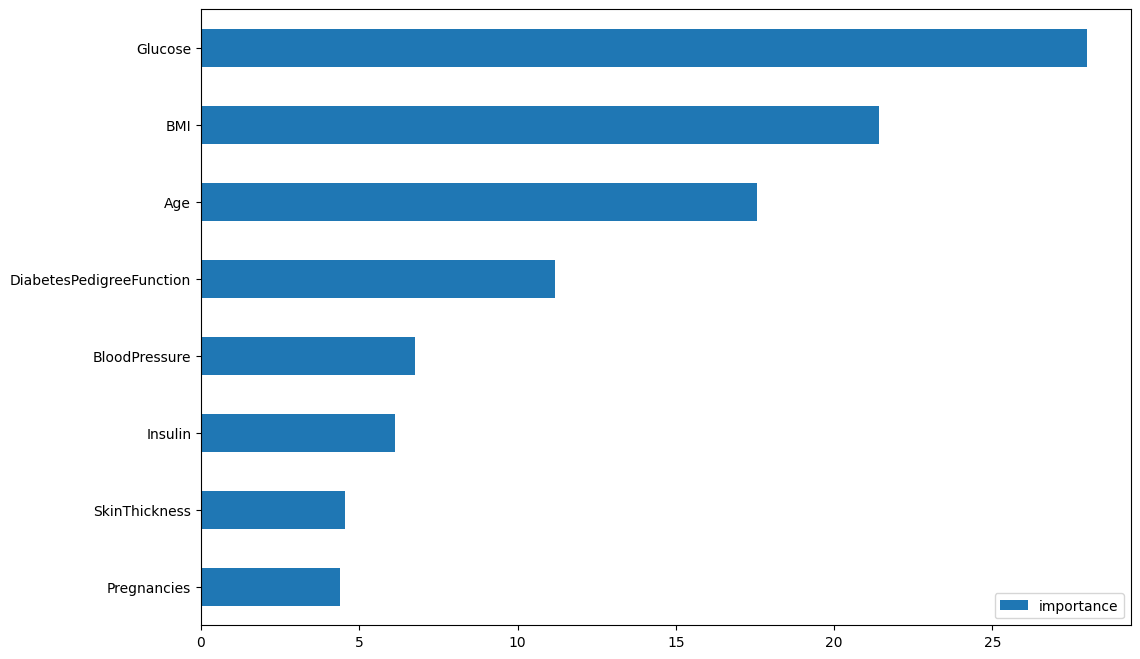

In [33]:
imp = pd.DataFrame(model.feature_importances_, index=X_train_scaled.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

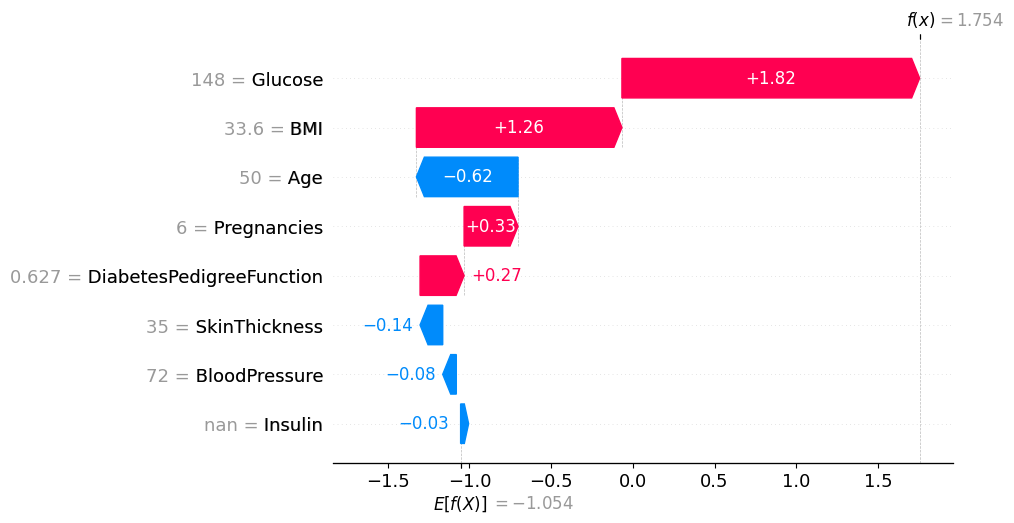

In [34]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

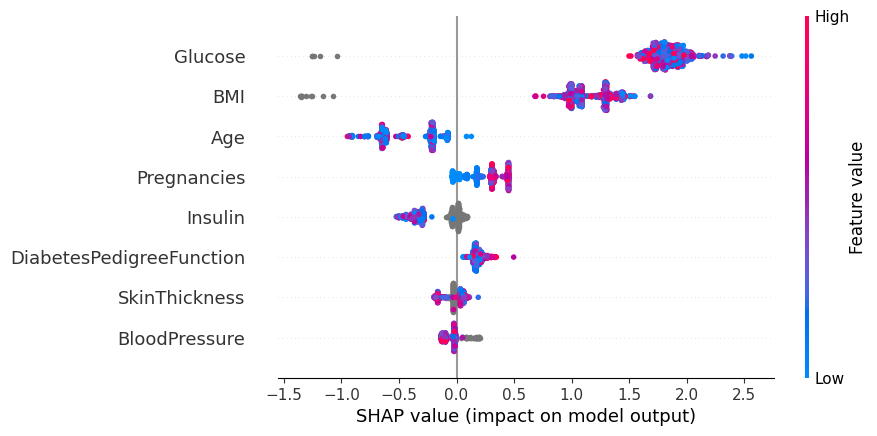

In [35]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

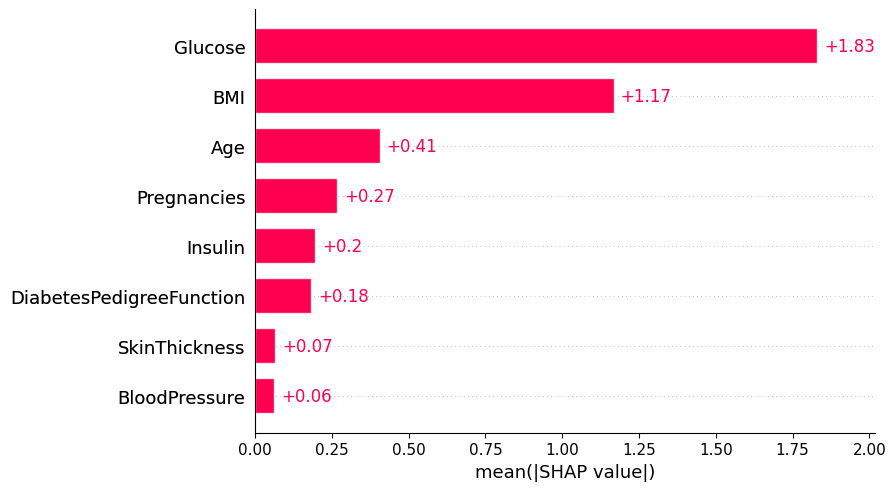

In [36]:
shap.plots.bar(shap_values)